# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-12-08 14:00:03.349850


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/7/20


,12/7/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,14949299,283703,1.90
Brazil,6623911,177317,2.68
India,9703770,140958,1.45
Mexico,1182249,110074,9.31
United Kingdom,1742525,61531,3.53
Italy,1742557,60606,3.48
France,2349059,55613,2.37


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 12/7/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
56493,US,14581243,2020-12-05,281186.0,2254.0,213866.0,190934.571429
56492,US,14367377,2020-12-04,278932.0,2607.0,227800.0,182650.857143
56491,US,14139577,2020-12-03,276325.0,2879.0,217664.0,179467.142857
56490,US,13921913,2020-12-02,273446.0,2804.0,200091.0,164180.000000
56489,US,13721822,2020-12-01,270642.0,2597.0,180637.0,161493.714286
56488,US,13541185,2020-11-30,268045.0,1172.0,157851.0,160401.000000
56487,US,13383334,2020-11-29,266873.0,826.0,138633.0,162353.000000


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/7/20


,12/7/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,713129,35034.0,4.91
Texas,1331719,23186.0,1.74
California,1390828,20015.0,1.44
Florida,1065785,19282.0,1.81
New Jersey,371579,17336.0,4.67
Illinois,796264,14214.0,1.79
Pennsylvania,432207,11319.0,2.62


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 12/7/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1923,California,1337941,2020-12-05,19870.0,136.0,27634.0,19616.714286
1922,California,1310307,2020-12-04,19734.0,181.0,23757.0,17818.714286
1921,California,1286550,2020-12-03,19553.0,143.0,21368.0,16392.571429
1920,California,1265182,2020-12-02,19410.0,106.0,19140.0,14891.714286
1919,California,1246042,2020-12-01,19304.0,131.0,15778.0,14404.714286
1918,California,1230264,2020-11-30,19173.0,22.0,14809.0,14577.857143
1917,California,1215455,2020-11-29,19151.0,35.0,14831.0,14418.714286


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 12/7/20


,12/7/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,457880,7936.0,1.73
Orange,88842,1633.0,1.84
Riverside,100088,1488.0,1.49
San Bernardino,107928,1188.0,1.10
San Diego,94169,1062.0,1.13
Sacramento,42808,614.0,1.43
Alameda,33477,522.0,1.56


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 12/7/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
6096,Los Angeles,439408,2020-12-05,7886.0,44.0,8825.0,6931.000000
6095,Los Angeles,430583,2020-12-04,7842.0,60.0,8702.0,6112.857143
6094,Los Angeles,421881,2020-12-03,7782.0,42.0,7696.0,5515.142857
6093,Los Angeles,414185,2020-12-02,7740.0,40.0,5789.0,5123.142857
6092,Los Angeles,408396,2020-12-01,7700.0,45.0,7477.0,4894.571429
6091,Los Angeles,400919,2020-11-30,7655.0,16.0,5076.0,4326.142857
6090,Los Angeles,395843,2020-11-29,7639.0,16.0,4952.0,4474.714286
6089,Los Angeles,390891,2020-11-28,7623.0,19.0,3098.0,4146.000000
6088,Los Angeles,387793,2020-11-27,7604.0,24.0,4518.0,4334.571429
6087,Los Angeles,383275,2020-11-26,7580.0,37.0,4952.0,4291.857143



7 day new US cases as of 12/7/20


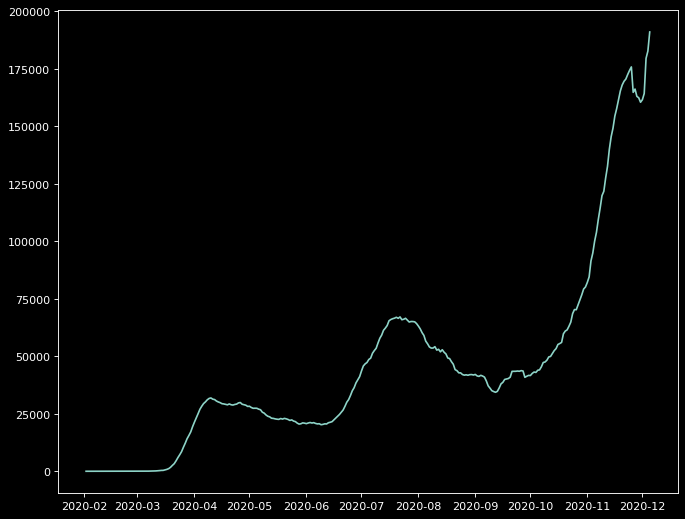

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 12/7/20


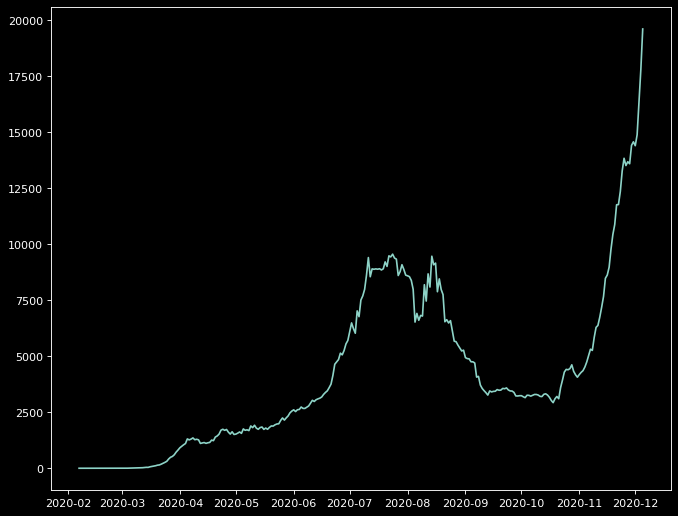

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 12/7/20


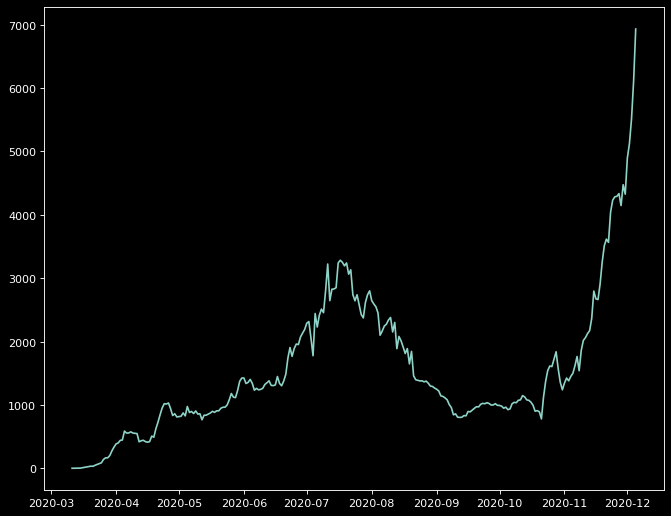

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()